In [11]:
import pandas as pd

# Load the Excel file
file_path = 'RealPerCapitaGDPValues.xlsx'
data = pd.read_excel(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(20)

# Reload the Excel file, skipping the initial rows and setting the header row
data = pd.read_excel(file_path, skiprows=11)

# Display the first few rows of the cleaned dataset
data.head()

# Rename columns for better readability
new_column_names = ['Country'] + [f'Value_{year}' for year in range(1970, 2034)] + [f'Growth_{year}' for year in range(1970, 2034)]
data.columns = new_column_names

# Display the first few rows with new column names
data.head()


,Country,Value_1970,Value_1971,Value_1972,Value_1973,Value_1974,Value_1975,Value_1976,Value_1977,Value_1978,...,Growth_2024,Growth_2025,Growth_2026,Growth_2027,Growth_2028,Growth_2029,Growth_2030,Growth_2031,Growth_2032,Growth_2033
0,Country,y1970,y1971,y1972,y1973,y1974,y1975,y1976,y1977,y1978,...,g2024,g2025,g2026,g2027,g2028,g2029,g2030,g2031,g2032,g2033
1,World,4889.411621,5016.619629,5184.820801,5414.487793,5426.239258,5369.38916,5552.745605,5684.664062,5815.748535,...,1.723062,2.02919,2.108398,2.035323,1.945385,1.94575,1.853745,1.755705,1.7651,1.774575
2,World less USA,3686.430176,3801.981934,3930.133057,4114.495117,4163.01123,4131.701172,4267.944336,4359.696289,4434.16748,...,2.141666,2.310192,2.259823,2.205096,2.172256,2.19251,2.071622,1.969713,1.98138,1.993028
3,United States and Canada,24855.6875,25336.8125,26361.3125,27593.625,27257.300781,26956.923828,28136.392578,29111.466797,30358.722656,...,0.592926,1.297195,1.768767,1.64916,1.376578,1.277195,1.269711,1.185352,1.185361,1.185365
4,Canada,19421.173828,19938.845703,20793.757812,21944.363281,22351.908203,22351.673828,23355.400391,23875.253906,24507.630859,...,0.92027,1.212904,1.297136,1.191659,1.192845,1.093438,0.994037,1.093441,1.093436,1.093442


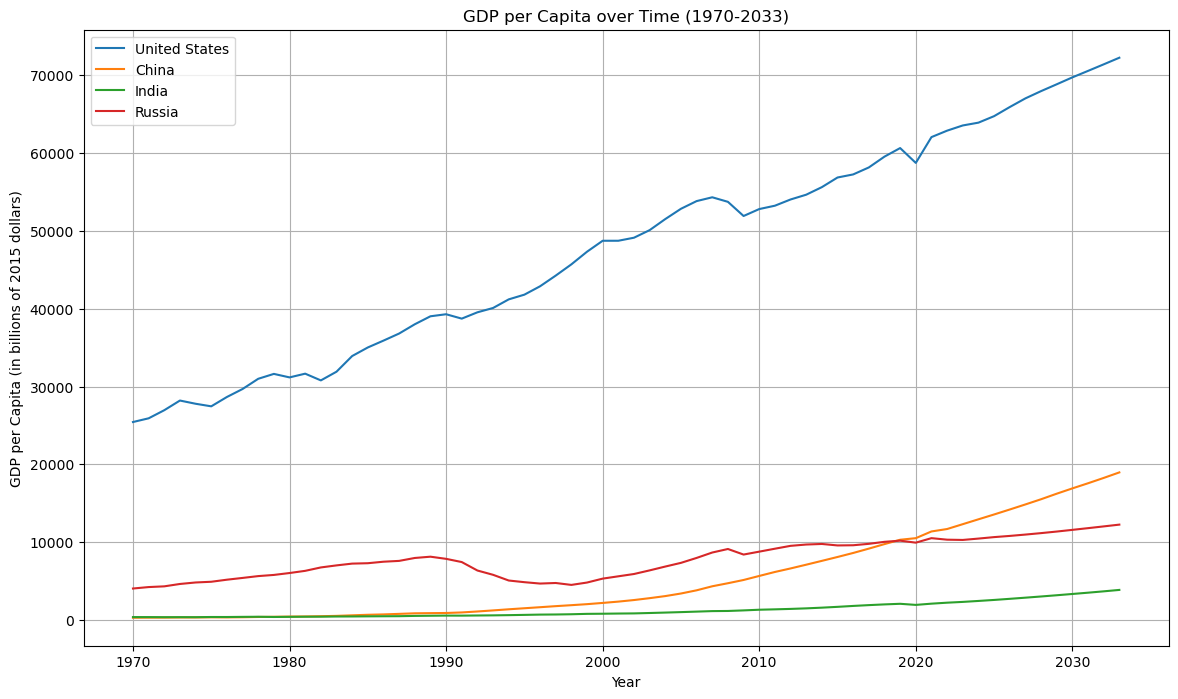

In [31]:
# Correct the country names and add Russia
countries_of_interest = ['United States', 'China', 'India', 'Russia']
filtered_data = data[data['Country'].isin(countries_of_interest)]

# Set the index to 'Country' for easy plotting
filtered_data.set_index('Country', inplace=True)

# Extract values for plotting
years = [f'Value_{year}' for year in range(1970, 2034)]
us_values = filtered_data.loc['United States', years].astype(float)
china_values = filtered_data.loc['China', years].astype(float)
india_values = filtered_data.loc['India', years].astype(float)
russia_values = filtered_data.loc['Russia', years].astype(float)

# Plot the GDP per capita for United States, China, India, and Russia over time
plt.figure(figsize=(14, 8))
plt.plot(range(1970, 2034), us_values, label='United States')
plt.plot(range(1970, 2034), china_values, label='China')
plt.plot(range(1970, 2034), india_values, label='India')
plt.plot(range(1970, 2034), russia_values, label='Russia')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (in billions of 2015 dollars)')
plt.title('GDP per Capita over Time (1970-2033)')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
# Correcting the print statement to display the DataFrame
print(us_yearly_percentage_increase_df.to_string(index=False))


 Year  Yearly Percentage Increase
 1970                         NaN
 1971                    1.873515
 1972                    4.023147
 1973                    4.609543
 1974                   -1.465941
 1975                   -1.188757
 1976                    4.371870
 1977                    3.578196
 1978                    4.425755
 1979                    2.030510
 1980                   -1.423378
 1981                    1.536307
 1982                   -2.734864
 1983                    3.632197
 1984                    6.312197
 1985                    3.250700
 1986                    2.510843
 1987                    2.538931
 1988                    3.235379
 1989                    2.698061
 1990                    0.672712
 1991                   -1.434248
 1992                    2.096503
 1993                    1.407009
 1994                    2.760838
 1995                    1.468564
 1996                    2.572242
 1997                    3.201174
 1998         

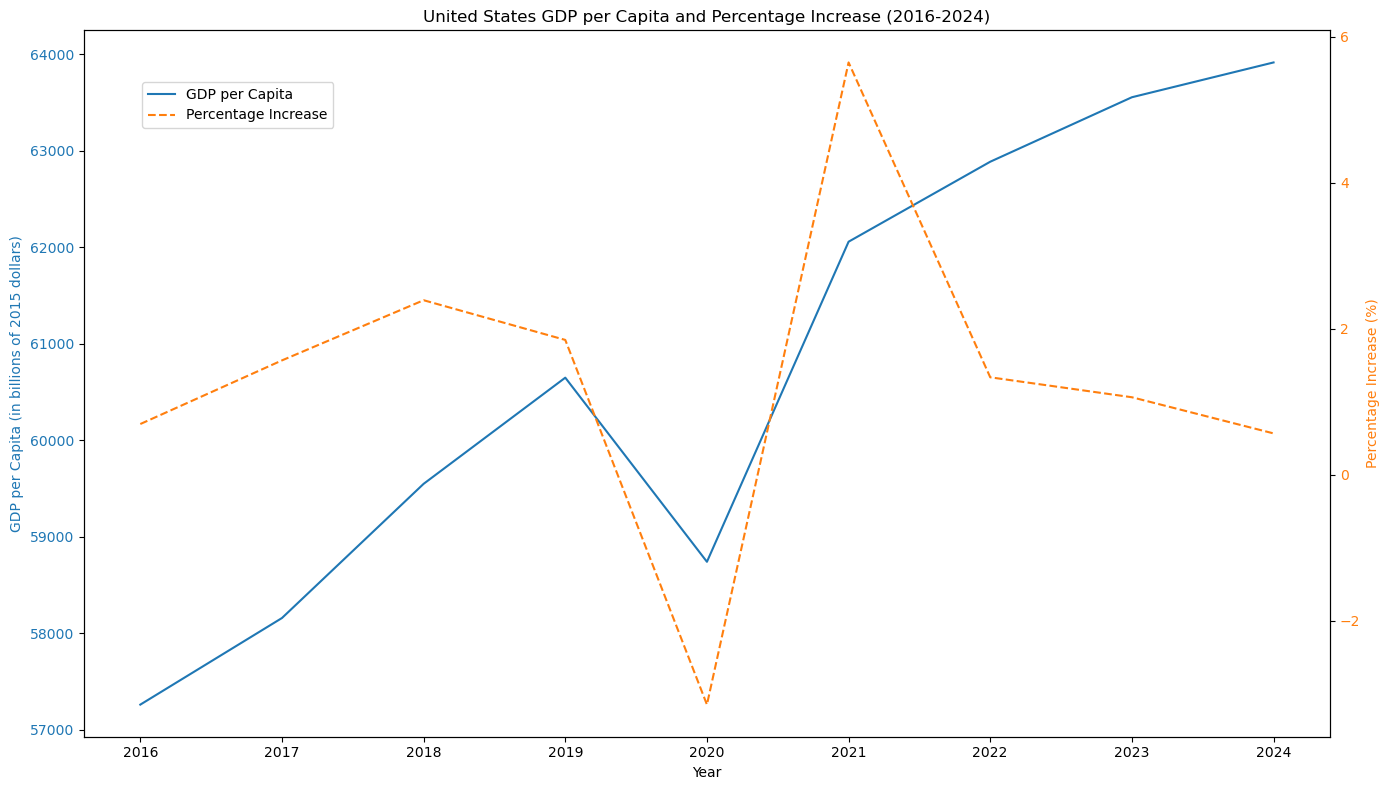

In [41]:
# Extract data for the United States for the years 2016 to 2024
years_range = [f'Value_{year}' for year in range(2016, 2025)]
growth_years_range = [f'Growth_{year}' for year in range(2016, 2025)]
us_values_recent = filtered_data.loc['United States', years_range].astype(float)
us_growth_recent = filtered_data.loc['United States', growth_years_range].astype(float)

# Create a DataFrame for easier plotting
us_recent_df = pd.DataFrame({
    'Year': range(2016, 2025),
    'GDP per Capita': us_values_recent.values,
    'Percentage Increase': us_growth_recent.values
})

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot GDP per Capita
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per Capita (in billions of 2015 dollars)', color='tab:blue')
ax1.plot(us_recent_df['Year'], us_recent_df['GDP per Capita'], color='tab:blue', label='GDP per Capita')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis to plot the percentage increase
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage Increase (%)', color='tab:orange')
ax2.plot(us_recent_df['Year'], us_recent_df['Percentage Increase'], color='tab:orange', linestyle='--', label='Percentage Increase')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Adding title and legend
plt.title('United States GDP per Capita and Percentage Increase (2016-2024)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))

plt.show()


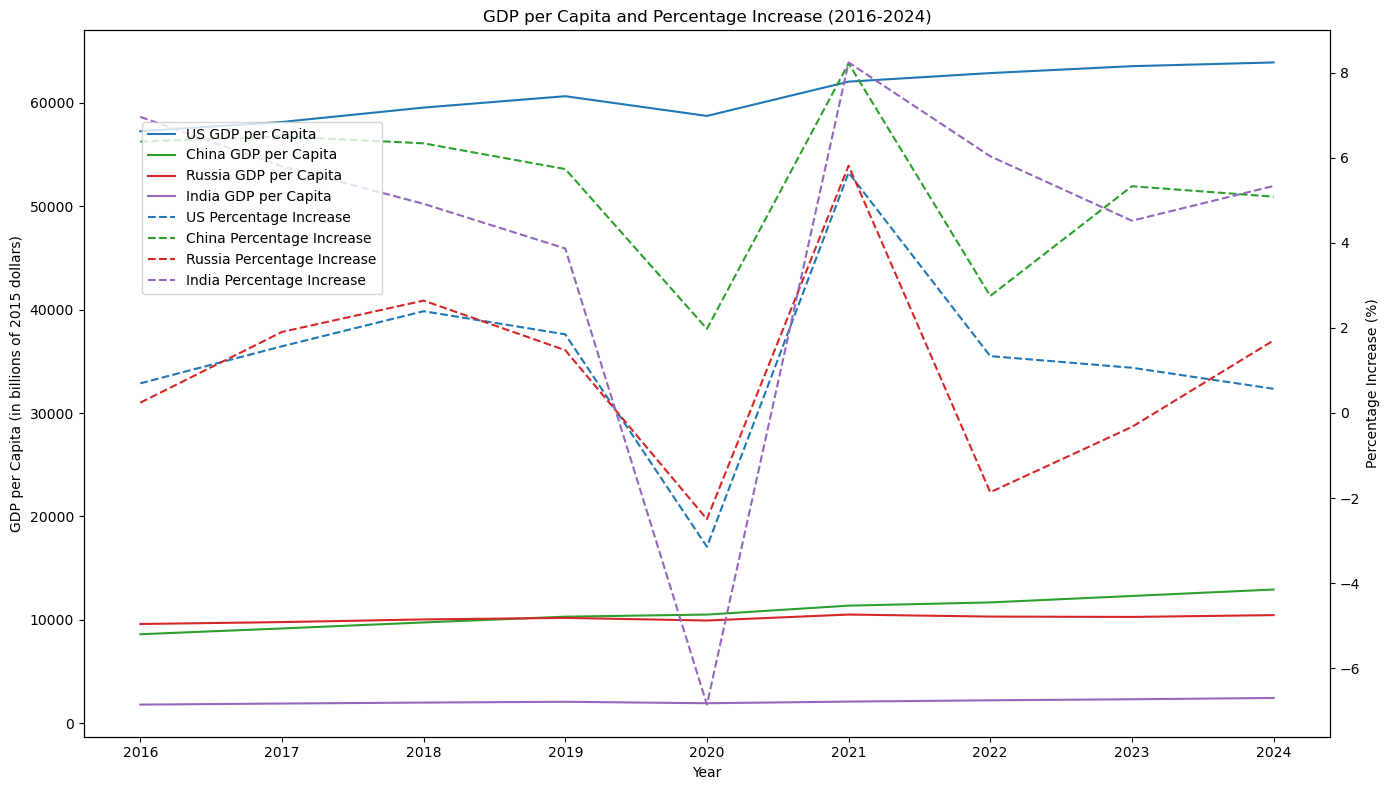

In [43]:
# Extract data for China, Russia, and India for the years 2016 to 2024
china_values_recent = filtered_data.loc['China', years_range].astype(float)
china_growth_recent = filtered_data.loc['China', growth_years_range].astype(float)

russia_values_recent = filtered_data.loc['Russia', years_range].astype(float)
russia_growth_recent = filtered_data.loc['Russia', growth_years_range].astype(float)

india_values_recent = filtered_data.loc['India', years_range].astype(float)
india_growth_recent = filtered_data.loc['India', growth_years_range].astype(float)

# Create a DataFrame for easier plotting
recent_df = pd.DataFrame({
    'Year': range(2016, 2025),
    'US GDP per Capita': us_values_recent.values,
    'China GDP per Capita': china_values_recent.values,
    'Russia GDP per Capita': russia_values_recent.values,
    'India GDP per Capita': india_values_recent.values,
    'US Percentage Increase': us_growth_recent.values,
    'China Percentage Increase': china_growth_recent.values,
    'Russia Percentage Increase': russia_growth_recent.values,
    'India Percentage Increase': india_growth_recent.values
})

# Plotting the data
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot GDP per Capita for each country
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP per Capita (in billions of 2015 dollars)')
ax1.plot(recent_df['Year'], recent_df['US GDP per Capita'], color='tab:blue', label='US GDP per Capita')
ax1.plot(recent_df['Year'], recent_df['China GDP per Capita'], color='tab:green', label='China GDP per Capita')
ax1.plot(recent_df['Year'], recent_df['Russia GDP per Capita'], color='tab:red', label='Russia GDP per Capita')
ax1.plot(recent_df['Year'], recent_df['India GDP per Capita'], color='tab:purple', label='India GDP per Capita')
ax1.tick_params(axis='y')

# Create a second y-axis to plot the percentage increase for each country
ax2 = ax1.twinx()
ax2.set_ylabel('Percentage Increase (%)')
ax2.plot(recent_df['Year'], recent_df['US Percentage Increase'], color='tab:blue', linestyle='--', label='US Percentage Increase')
ax2.plot(recent_df['Year'], recent_df['China Percentage Increase'], color='tab:green', linestyle='--', label='China Percentage Increase')
ax2.plot(recent_df['Year'], recent_df['Russia Percentage Increase'], color='tab:red', linestyle='--', label='Russia Percentage Increase')
ax2.plot(recent_df['Year'], recent_df['India Percentage Increase'], color='tab:purple', linestyle='--', label='India Percentage Increase')
ax2.tick_params(axis='y')

# Adding title and legend
plt.title('GDP per Capita and Percentage Increase (2016-2024)')
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.85))

plt.show()
